In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('./values.csv')
df.head()

,Epoch,Loss,Pawn_Middlegame,Pawn_Endgame,Knight_Middlegame,Knight_Endgame,Bishop_Middlegame,Bishop_Endgame,Rook_Middlegame,Rook_Endgame,Queen_Middlegame,Queen_Endgame
0,0,0.146401,420,248,54,217,377,441,440,307,353,453
1,10,0.133805,329,152,-32,128,287,348,349,218,264,417
2,20,0.132709,330,118,1,147,292,274,357,238,287,498
3,30,0.131716,313,129,1,211,278,223,351,304,287,590
4,40,0.130565,306,112,48,253,286,183,359,354,337,680


In [41]:
# Convert from centipawns to pawns
df.iloc[:, 2:] = df.iloc[:, 2:].div(100)
df.head()

,Epoch,Loss,Pawn_Middlegame,Pawn_Endgame,Knight_Middlegame,Knight_Endgame,Bishop_Middlegame,Bishop_Endgame,Rook_Middlegame,Rook_Endgame,Queen_Middlegame,Queen_Endgame
0,0,0.146401,4.20,2.48,0.54,2.17,3.77,4.41,4.40,3.07,3.53,4.53
1,10,0.133805,3.29,1.52,-0.32,1.28,2.87,3.48,3.49,2.18,2.64,4.17
2,20,0.132709,3.30,1.18,0.01,1.47,2.92,2.74,3.57,2.38,2.87,4.98
3,30,0.131716,3.13,1.29,0.01,2.11,2.78,2.23,3.51,3.04,2.87,5.90
4,40,0.130565,3.06,1.12,0.48,2.53,2.86,1.83,3.59,3.54,3.37,6.80


In [42]:
# Long-form for Seaborn
df_melted = pd.melt(df, id_vars=['Epoch', 'Loss'], var_name='Piece_Type', value_name='Value')

# Extract piece type and MG/EG information
df_melted['Game stage'] = df_melted['Piece_Type'].apply(lambda x: x.split('_')[1])
df_melted['Piece'] = df_melted['Piece_Type'].apply(lambda x: x.split('_')[0])

In [44]:
df_melted.head()

,Epoch,Loss,Piece_Type,Value,Game stage,Piece
0,0,0.146401,Pawn_Middlegame,4.20,Middlegame,Pawn
1,10,0.133805,Pawn_Middlegame,3.29,Middlegame,Pawn
2,20,0.132709,Pawn_Middlegame,3.30,Middlegame,Pawn
3,30,0.131716,Pawn_Middlegame,3.13,Middlegame,Pawn
4,40,0.130565,Pawn_Middlegame,3.06,Middlegame,Pawn


# Material values

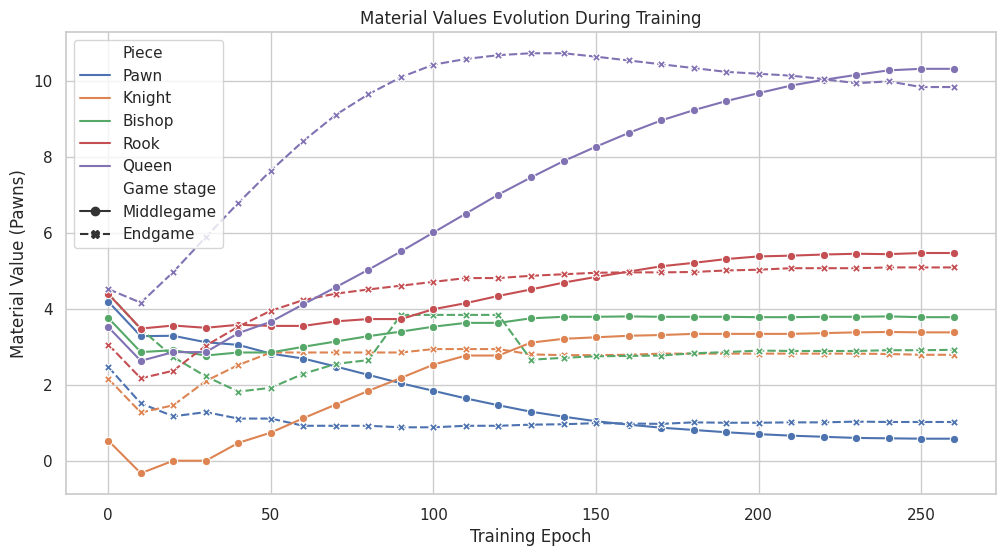

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plot = sns.lineplot(x='Epoch', y='Value', hue='Piece', style='Game stage', markers=True, data=df_melted)

# Set plot labels and title
plt.xlabel('Training Epoch')
plt.ylabel('Material Value (Pawns)')
plt.title('Material Values Evolution During Training')


# Show legend
plt.legend()

# Show the plot
plt.show()

# Loss

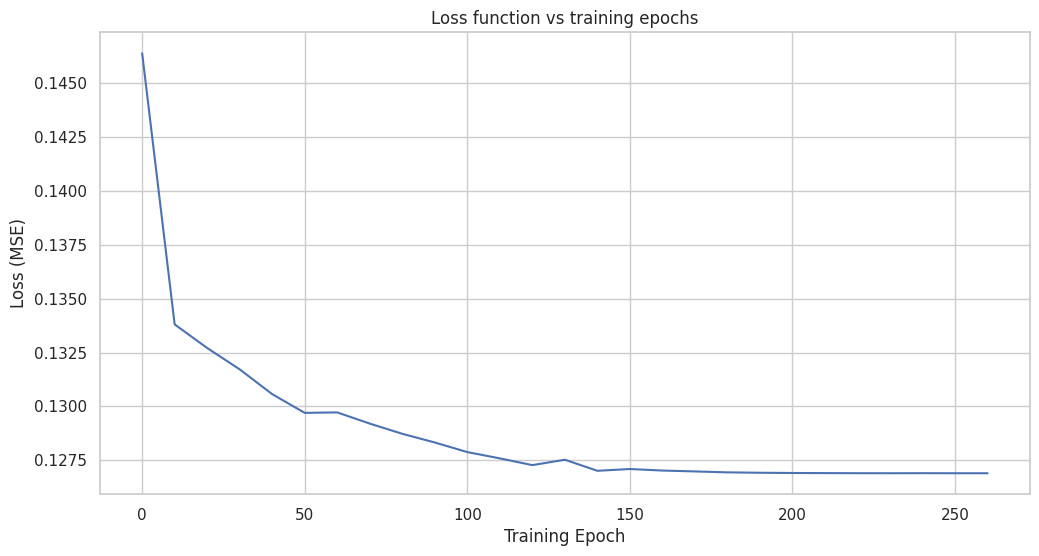

In [46]:
plt.figure(figsize=(12, 6))

plot = sns.lineplot(x='Epoch', y='Loss', markers=True, data=df)

# Set plot labels and title
plt.xlabel('Training Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss function vs training epochs')


# Show legend
# plt.legend(title='Game Phase')

# Show the plot
plt.show()